In [19]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

In [20]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_MHS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    R1 = nc_fid.variables["channel_1"][:]  # shape lat, lon as shown above
    R2 = nc_fid.variables["channel_2"][:]  # shape lat, lon as shown above
    SZ = nc_fid.variables["satellite_zenith"][:]
    lats = nc_fid.variables['lat'][:]  # extract/copy the data
    lons = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return R1, R2, SZ, lats, lons, names

def read_SSMIS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB1 = nc_fid.variables["fcdr_tb91h_img2"][:]  # shape lat, lon as shown above
    TB2 = nc_fid.variables["fcdr_tb91v_img2"][:]  # shape lat, lon as shown above
    TB3 = nc_fid.variables["tb150h_img1"][:]  # shape lat, lon as shown above
    lats = nc_fid.variables['lat_img2'][:]  # extract/copy the data
    lons = nc_fid.variables['lon_img2'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB1, TB2, TB3, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

def read_radar_vel(ncf):
    nc_fid = Dataset(ncf, 'r')
    V = nc_fid.variables["RadialVelocity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return V, lat, lon, names

def make_radar_mask(Z,lat,lon):
    Z[Z>70]=69
    print('Z shape', Z.shape, Z)
    Z_30 = ma.masked_where(Z < 30, Z)
    print('Z_30 shape', Z_30.shape)
    Z_40 = ma.masked_where(Z < 40, Z)
    print('Z_40 shape', Z_40.shape)
    lonz,latz = np.meshgrid(lon,lat)
    print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)
    return Z_30, Z_40, lonz, latz

Z_file_DVN = 'KDVN_Z_20120629_162232.nc'
Z_DVN, lat_dvn, lon_dvn, names = read_radar_plot(Z_file_DVN)
Z_DVN = Z_DVN[0,:,:]
Z_DVN = np.nan_to_num(Z_DVN)
print(names)
print('Z_DVN shape', Z_DVN.shape, Z_DVN)
Z_DVN_max = np.amax(Z_DVN)
Z_DVN_min = np.amin(Z_DVN)
print('Z_DVN min, Z_DVN max', Z_DVN_min, Z_DVN_max)
print('lat shape, lon shape', lat_dvn.shape, lon_dvn.shape)

Z_30_DVN, Z_40_DVN, lonz_dvn, latz_dvn = make_radar_mask(Z_DVN, lat_dvn, lon_dvn) 

Z_file_IWX = 'KIWX_Z_20120629_185459.nc'
Z_IWX, lat_iwx, lon_iwx, names = read_radar_plot(Z_file_IWX)
Z_IWX = Z_IWX[0,:,:]
Z_IWX = np.nan_to_num(Z_IWX)
print(names)
print('Z_IWX shape', Z_IWX.shape, Z_IWX)
Z_IWX_max = np.amax(Z_IWX)
Z_IWX_min = np.amin(Z_IWX)
print('Z_IWX min, Z_IWX max', Z_IWX_min, Z_IWX_max)
print('lat shape, lon shape', lat_iwx.shape, lon_iwx.shape)

Z_30_IWX, Z_40_IWX, lonz_iwx, latz_iwx = make_radar_mask(Z_IWX, lat_iwx, lon_iwx) 

Z_file_ILN = 'KILN_V03_20120629_220340.nc'
Z_ILN, lat_iln, lon_iln, names = read_radar_plot(Z_file_ILN)
Z_ILN = Z_ILN[0,:,:]
Z_ILN = np.nan_to_num(Z_ILN)
print(names)
print('Z_ILN shape', Z_ILN.shape, Z_ILN)
Z_ILN_max = np.amax(Z_ILN)
Z_ILN_min = np.amin(Z_ILN)
print('Z_ILN min, Z_ILN max', Z_ILN_min, Z_ILN_max)
print('lat shape, lon shape', lat_iln.shape, lon_iln.shape)

Z_30_ILN, Z_40_ILN, lonz_iln, latz_iln = make_radar_mask(Z_ILN, lat_iln, lon_iln) 

Z_file_LWX = 'KLWX_V06_20120630_020528.nc'
Z_LWX, lat_lwx, lon_lwx, names = read_radar_plot(Z_file_LWX)
Z_LWX = Z_LWX[0,:,:]
Z_LWX = np.nan_to_num(Z_LWX)
print(names)
print('Z_LWX shape', Z_LWX.shape, Z_LWX)
Z_LWX_max = np.amax(Z_LWX)
Z_LWX_min = np.amin(Z_LWX)
print('Z_LWX min, Z_LWX max', Z_LWX_min, Z_LWX_max)
print('lat shape, lon shape', lat_lwx.shape, lon_lwx.shape)

Z_30_LWX, Z_40_LWX, lonz_lwx, latz_lwx = make_radar_mask(Z_LWX, lat_lwx, lon_lwx) 

V_file = 'KLOT_V_cappi_3km_20120629_162431.nc'
V_LOT, lat_lot, lon_lot, names = read_radar_vel(V_file)
V_LOT = V_LOT[0,0,:,:]
V_LOT = np.nan_to_num(V_LOT)
print(names)
print('V LOT shape', V_LOT.shape, V_LOT)
V_LOT_max = np.amax(V_LOT)
V_LOT_min = np.amin(V_LOT)
print('V min, V max', V_LOT_min, V_LOT_max)
lon_lot_min = np.amin(lon_lot)
lon_lot_max = np.amax(lon_lot)
lon_lot_405 = lon_lot[405]
print('Lon min, max, x = 405', lon_lot_min, lon_lot_max, lon_lot_405)
print('lat shape, lon shape', lat_lot.shape, lon_lot.shape)

shape = V_LOT.shape
V_deal_lot = np.zeros((587, 813))
print('V_deal_0s LOT', V_deal_lot)
for y in range(0, 406):
    for x in range(0, 586):
        if V_LOT[x, y] > 30:
            V_deal_lot[x, y] = V_LOT_max + (V_LOT_max - V_LOT[x, y])
        else:
            V_deal_lot[x, y] = V_LOT[x, y]

for y in range(406, 812):
    for x in range(0, 586):
        V_deal_lot[x, y] = V_LOT[x, y]
            
V_deal_lot=np.absolute(V_deal_lot)
print('V_deal LOT shape', V_deal_lot.shape, V_deal_lot)
V_deal_lot_max = np.amax(V_deal_lot)
V_deal_lot_min = np.amin(V_deal_lot)
print('V_deal min, V_deal max', V_deal_lot_min, V_deal_lot_max)

V_20_LOT = ma.masked_where(V_deal_lot < 20, V_deal_lot)
print('V_20 LOT shape', V_20_LOT.shape)
lonv_lot,latv_lot = np.meshgrid(lon_lot,lat_lot)
print('lats shape, lons shape', latv_lot.shape, lonv_lot.shape, latv_lot,lonv_lot)

V_file = 'KIWX_V_cappi_3km_20120629_185459.nc'
V_IWX, lat_iwx, lon_iwx, names = read_radar_vel(V_file)
V_IWX = V_IWX[0,0,:,:]
V_IWX = np.nan_to_num(V_IWX)
print(names)
print('V IWX shape', V_IWX.shape, V_IWX)
V_IWX_max = np.amax(V_IWX)
V_IWX_min = np.amin(V_IWX)
print('V min, V max', V_IWX_min, V_IWX_max)
lon_iwx_min = np.amin(lon_iwx)
lon_iwx_max = np.amax(lon_iwx)
lon_iwx_403 = lon_iwx[403]
print('Lon min, max, x = 403', lon_iwx_min, lon_iwx_max, lon_iwx_403)
print('lat shape, lon shape', lat_iwx.shape, lon_iwx.shape)

shape = V_IWX.shape
V_deal_iwx = np.zeros((587, 810))
print('V_deal_0s IWX', V_deal_iwx)
V_deal_iwx = V_IWX
for y in range(0, 404):
    for x in range(0, 586):
        if V_IWX[x, y] > 30:
            V_deal_iwx[x, y] = V_IWX_max + (V_IWX_max - V_IWX[x, y])
        else:
            V_deal_iwx[x, y] = V_IWX[x, y]

for y in range(404, 809):
    for x in range(0, 586):
        if V_IWX[x, y] < -20:
            V_deal_iwx[x, y] = V_IWX_max + (V_IWX_max - np.absolute(V_IWX[x, y]))
        else:
            V_deal_iwx[x, y] = V_IWX[x, y]
        
V_deal_iwx=np.absolute(V_deal_iwx)
print('V_deal IWX shape', V_deal_iwx.shape, V_deal_iwx)
V_deal_iwx_max = np.amax(V_deal_iwx)
V_deal_iwx_min = np.amin(V_deal_iwx)
print('V_deal min, V_deal max', V_deal_iwx_min, V_deal_iwx_max)

V_20_IWX = ma.masked_where(V_deal_iwx < 20, V_deal_iwx)
print('V_20 IWX shape', V_20_IWX.shape)
lonv_iwx,latv_iwx = np.meshgrid(lon_iwx,lat_iwx)
print('lats shape, lons shape', latv_iwx.shape, lonv_iwx.shape, latv_iwx, lonv_iwx)

V_file = 'KILN_V_cappi_3km_20120629_220340.nc'
V_ILN, lat_iln, lon_iln, names = read_radar_vel(V_file)
V_ILN = V_ILN[0,0,:,:]
V_ILN = np.nan_to_num(V_ILN)
print(names)
print('V ILN shape', V_ILN.shape, V_ILN)
V_ILN_max = np.amax(V_ILN)
V_ILN_min = np.amin(V_ILN)
print('V min, V max', V_ILN_min, V_ILN_max)
lon_iln_min = np.amin(lon_iln)
lon_iln_max = np.amax(lon_iln)
lon_iln_392 = lon_iln[392]
print('Lon min, max, x = 392', lon_iln_min, lon_iln_max, lon_iln_392)
print('lat shape, lon shape', lat_iln.shape, lon_iln.shape)

shape = V_ILN.shape
V_deal_iln = np.zeros((587,785))
print('V_deal_0s ILN', V_deal_iln)
V_deal_iln = V_ILN

for y in range(0, 393):
    for x in range(0, 586):
        if V_ILN[x, y] > 30:
            V_deal_iln[x, y] = V_ILN_max + (V_ILN_max - V_ILN[x, y])
        else:
            V_deal_iln[x, y] = V_ILN[x, y]

for y in range(393, 784):
    for x in range(0, 586):
        if V_ILN[x, y] < -40:
            V_deal_iln[x, y] = V_ILN_max + (V_ILN_max - np.absolute(V_ILN[x, y]))
        else:
            V_deal_iln[x, y] = V_ILN[x, y]

V_deal_iln=np.absolute(V_deal_iln)
print('V_deal shape', V_deal_iln.shape, V_deal_iln)
V_deal_iln_max = np.amax(V_deal_iln)
V_deal_iln_min = np.amin(V_deal_iln)
print('V_deal min, V_deal max', V_deal_iln_min, V_deal_iln_max)

V_20_ILN = ma.masked_where(V_deal_iln < 20, V_deal_iln)
print('V_20 shape', V_20_ILN.shape)
lonv_iln,latv_iln = np.meshgrid(lon_iln,lat_iln)
print('lats shape, lons shape', latv_iln.shape, lonv_iln.shape, latv_iln, lonv_iln)

V_file = 'KLWX_V_cappi_3km_20120630_020528.nc'
V_LWX, lat_lwx, lon_lwx, names = read_radar_vel(V_file)
V_LWX = V_LWX[0,0,:,:]
V_LWX = np.nan_to_num(V_LWX)
print(names)
print('V shape', V_LWX.shape, V_LWX)
V_LWX_max = np.amax(V_LWX)
V_LWX_min = np.amin(V_LWX)
print('V min, V max', V_LWX_min, V_LWX_max)
print('lat shape, lon shape', lat_lwx.shape, lon_lwx.shape)

shape = V_LWX.shape
V_deal_lwx = np.zeros((587,780))
print('V_deal_0s LWX', V_deal_lwx)
V_deal_lwx = V_LWX

for y in range(0, 390):
    for x in range(0, 586):
        if V_LWX[x, y] > 20:
            V_deal_lwx[x, y] = V_LWX_max + (V_LWX_max - V_LWX[x, y])
        else:
            V_deal_lwx[x, y] = V_LWX[x, y]

V_deal_lwx=np.absolute(V_deal_lwx)
print('V_deal shape', V_deal_lwx.shape, V_deal_lwx)
V_deal_lwx_max = np.amax(V_deal_lwx)
V_deal_lwx_min = np.amin(V_deal_lwx)
print('V_deal min, V_deal max', V_deal_lwx_min, V_deal_lwx_max)

V_20_LWX = ma.masked_where(V_deal_lwx < 20, V_deal_lwx)
print('V_20 shape', V_20_LWX.shape)
lonv_lwx,latv_lwx = np.meshgrid(lon_lwx,lat_lwx)
print('lats shape, lons shape', latv_lwx.shape, lonv_lwx.shape, latv_lwx, lonv_lwx)

MHS_file1 = 'W_XX-EUMETSAT-Darmstadt,SOUNDING+SATELLITE,METOPA+MHS_C_EUMP_20120629161855_29550_eps_o_l1.nc'
R1, R2, SZ, lats, lons, names = read_MHS_plot(MHS_file1)
SZ_5 = ma.masked_where(SZ > 5.0, SZ)
print('SZ_5 shape', SZ_5.shape)
R1_kw = R1 * 1000
R1_kwmn = np.mean(R1_kw)
R2_kw = R2 * 1000
R2_kwmn = np.mean(R2_kw)
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("R1 mean = ", R1_kwmn)
print("R2 mean = ", R1_kwmn)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
R1_max = np.amax(R1_kw) 
R1_min = np.amin(R1_kw)
print("R1 max =", R1_max)
print("R1 min =", R1_min)
print("R1 = ", R1_kw, R1_kw.shape)
R2_max = np.amax(R2_kw)
R2_min = np.amin(R2_kw)
print("R2 max =", R2_max)
print("R2 min =", R2_min)
print("R2 = ", R2_kw, R2_kw.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)

MHS_file2 = 'W_XX-EUMETSAT-Darmstadt,SOUNDING+SATELLITE,METOPA+MHS_C_EUMP_20120630020055_29555_eps_o_l1.nc'
R2_1, R2_2, SZ2, lats3, lons3, names = read_MHS_plot(MHS_file2)
SZ2_5 = ma.masked_where(SZ2 > 5.0, SZ2)
print('SZ_5 shape', SZ_5.shape)
R2_1_kw = R2_1 * 1000
R2_1_kwmn = np.mean(R2_1_kw)
R2_2_kw = R2_2 * 1000
R2_2_kwmn = np.mean(R2_2_kw)
print("R1 mean = ", R2_1_kwmn)
print("R2 mean = ", R2_1_kwmn)
R2_1_max = np.amax(R2_1_kw) 
R2_1_min = np.amin(R2_1_kw)
print("R1 max =", R2_1_max)
print("R1 min =", R2_1_min)
print("R1 = ", R2_1_kw, R2_1_kw.shape)
R2_2_max = np.amax(R2_2_kw)
R2_2_min = np.amin(R2_2_kw)
print("R2 max =", R2_2_max)
print("R2 min =", R2_2_min)
print("R2 = ", R2_2_kw, R2_2_kw.shape)
lats3_mn = np.mean(lats3)
lons3_mn = np.mean(lons3)
print("Lats mean= ", lats3_mn)
print("Lons mean= ", lons3_mn)
print("Lats = ", lats3, lats3.shape)
print("Lons = ", lons3, lons3.shape)

SSMIS_file = 'CSU_SSMIS_FCDR_V01R00_F17_D20120629_S2155_E2337_R29162.nc'
TB1, TB2, TB3, lats2, lons2, names = read_SSMIS_plot(SSMIS_file)
TB1 = TB1[315:365,135:179]
lats2 = lats2[315:365,135:179]
lons2 = lons2[315:365,135:179]
lats2_mn = np.mean(lats2)
lons2_mn = np.mean(lons2)
print("Lats mean= ", lats2_mn)
print("Lons mean= ", lons2_mn)
TB1_max = np.amax(TB1) 
TB1_min = np.amin(TB1)
print("TB1 max =", TB1_max)
print("TB1 min =", TB1_min)
print("TB1 = ", TB1, TB1.shape)
TB2 = TB2[315:365,135:179]
TB2_max = np.amax(TB2)
TB2_min = np.amin(TB2)
print("TB2 max =", TB2_max)
print("TB2 min =", TB2_min)
print("TB2 = ", TB2, TB2.shape)
TB3 = TB3[315:365,135:179]
TB3_max = np.amax(TB3)
TB3_min = np.amin(TB3)
print("TB3 max =", TB3_max)
print("TB3 min =", TB3_min)
print("TB3 = ", TB3, TB3.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape) 

PCT = (1.818*TB2)-(0.818*TB1)
PCTmn = np.mean(PCT)
print("PCT mean = ", PCTmn)
PCT_max = np.amax(PCT)
PCT_min = np.amin(PCT)
print("PCT max =", PCT_max)
print("PCT min =", PCT_min)
print("PCT = ", PCT, PCT.shape)

/tmp/ipykernel_918/2066096593.py:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
/tmp/ipykernel_918/2066096593.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_fid.variables['lat'][:]  # extract/copy the data
/tmp/ipykernel_918/2066096593.py:30: DeprecationWarni

dict_keys(['Reflectivity', 'lat', 'lon', 'time'])
Z_DVN shape (587, 813) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_DVN min, Z_DVN max -23.5 62.5
lat shape, lon shape (587,) (813,)
Z shape (587, 813) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_30 shape (587, 813)
Z_40 shape (587, 813)
lats shape, lons shape (587, 813) (587, 813) [[39.37711678 39.37711678 39.37711678 ... 39.37711678 39.37711678
  39.37711678]
 [39.38462574 39.38462574 39.38462574 ... 39.38462574 39.38462574
  39.38462574]
 [39.39213471 39.39213471 39.39213471 ... 39.39213471 39.39213471
  39.39213471]
 ...
 [43.76235299 43.76235299 43.76235299 ... 43.76235299 43.76235299
  43.76235299]
 [43.76986196 43.76986196 43.76986196 ... 43.76986196 43.76986196
  43.76986196]
 [43.77737093 43.77737093 43.7

V_deal LOT shape (587, 813) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
V_deal min, V_deal max 0.0 61.23109817504883
V_20 LOT shape (587, 813)
lats shape, lons shape (587, 813) (587, 813) [[39.36577267 39.36577267 39.36577267 ... 39.36577267 39.36577267
  39.36577267]
 [39.37328038 39.37328038 39.37328038 ... 39.37328038 39.37328038
  39.37328038]
 [39.38078809 39.38078809 39.38078809 ... 39.38078809 39.38078809
  39.38078809]
 ...
 [43.75027682 43.75027682 43.75027682 ... 43.75027682 43.75027682
  43.75027682]
 [43.75778453 43.75778453 43.75778453 ... 43.75778453 43.75778453
  43.75778453]
 [43.76529224 43.76529224 43.76529224 ... 43.76529224 43.76529224
  43.76529224]] [[-91.13660517 -91.12909746 -91.12158974 ... -85.05535797 -85.04785026
  -85.04034254]
 [-91.13660517 -91.12909746 -91.12158974 ... -85.05535797 -85.04785026
  -85.04034254]
 [-91.13660517 -91.12909746 -91.12

V_deal IWX shape (587, 810) [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
V_deal min, V_deal max 0.0 117.60258674621582
V_20 IWX shape (587, 810)
lats shape, lons shape (587, 810) (587, 810) [[39.11903458 39.11903458 39.11903458 ... 39.11903458 39.11903458
  39.11903458]
 [39.12653828 39.12653828 39.12653828 ... 39.12653828 39.12653828
  39.12653828]
 [39.13404197 39.13404197 39.13404197 ... 39.13404197 39.13404197
  39.13404197]
 ...
 [43.50119313 43.50119313 43.50119313 ... 43.50119313 43.50119313
  43.50119313]
 [43.50869683 43.50869683 43.50869683 ... 43.50869683 43.50869683
  43.50869683]
 [43.51620052 43.51620052 43.51620052 ... 43.51620052 43.51620052
  43.51620052]] [[-88.73899694 -88.73149324 -88.72398955 ... -82.68351415 -82.67601045
  -82.66850676]
 [-88.73899694 -88.73149324 -88.72398955 ... -82.68351415 -82.67601045
  -82.6685067

V_deal shape (587, 785) [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
V_deal min, V_deal max 0.0 85.52915573120117
V_20 shape (587, 785)
lats shape, lons shape (587, 785) (587, 785) [[37.18391178 37.18391178 37.18391178 ... 37.18391178 37.18391178
  37.18391178]
 [37.19141903 37.19141903 37.19141903 ... 37.19141903 37.19141903
  37.19141903]
 [37.19892628 37.19892628 37.19892628 ... 37.19892628 37.19892628
  37.19892628]
 ...
 [41.56814559 41.56814559 41.56814559 ... 41.56814559 41.56814559
  41.56814559]
 [41.57565284 41.57565284 41.57565284 ... 41.57565284 41.57565284
  41.57565284]
 [41.58316009 41.58316009 41.58316009 ... 41.58316009 41.58316009
  41.58316009]] [[-86.7682655  -86.76075825 -86.753251   ... -80.89759625 -80.890089
  -80.88258175]
 [-86.7682655  -86.76075825 -86.753251   ... -80.89759625 -80.890089
  -80.88258175]
 [-86.7682

V_deal shape (587, 780) [[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]
V_deal min, V_deal max 0.0 78.7257022857666
V_20 shape (587, 780)
lats shape, lons shape (587, 780) (587, 780) [[36.73915911 36.73915911 36.73915911 ... 36.73915911 36.73915911
  36.73915911]
 [36.74666216 36.74666216 36.74666216 ... 36.74666216 36.74666216
  36.74666216]
 [36.75416521 36.75416521 36.75416521 ... 36.75416521 36.75416521
  36.75416521]
 ...
 [41.12094134 41.12094134 41.12094134 ... 41.12094134 41.12094134
  41.12094134]
 [41.12844439 41.12844439 41.12844439 ... 41.12844439 41.12844439
  41.12844439]
 [41.13594744 41.13594744 41.13594744 ... 41.13594744 41.13594744
  41.13594744]] [[-80.41370019 -80.40619714 -80.39869408 ... -74.58382897 -74.57632592
  -74.56882286]
 [-80.41370019 -80.40619714 -80.39869408 ... -74.58382897 -74.57632592
  -74.56882286]
 [-80.4

/tmp/ipykernel_918/2066096593.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R1 = nc_fid.variables["channel_1"][:]  # shape lat, lon as shown above
/tmp/ipykernel_918/2066096593.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  R2 = nc_fid.variables["channel_2"][:]  # shape lat, lon as shown above
/tmp/ipykernel_918/2066096593.py:8: Deprecat

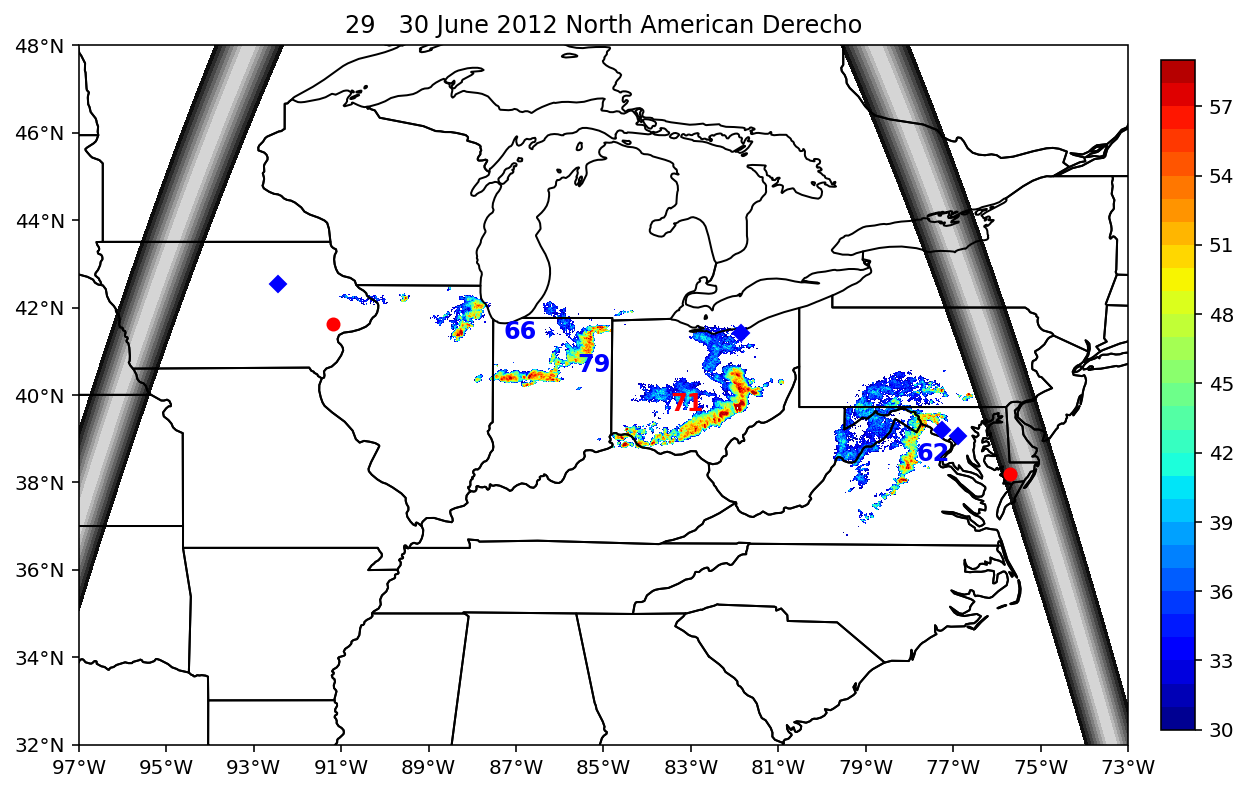

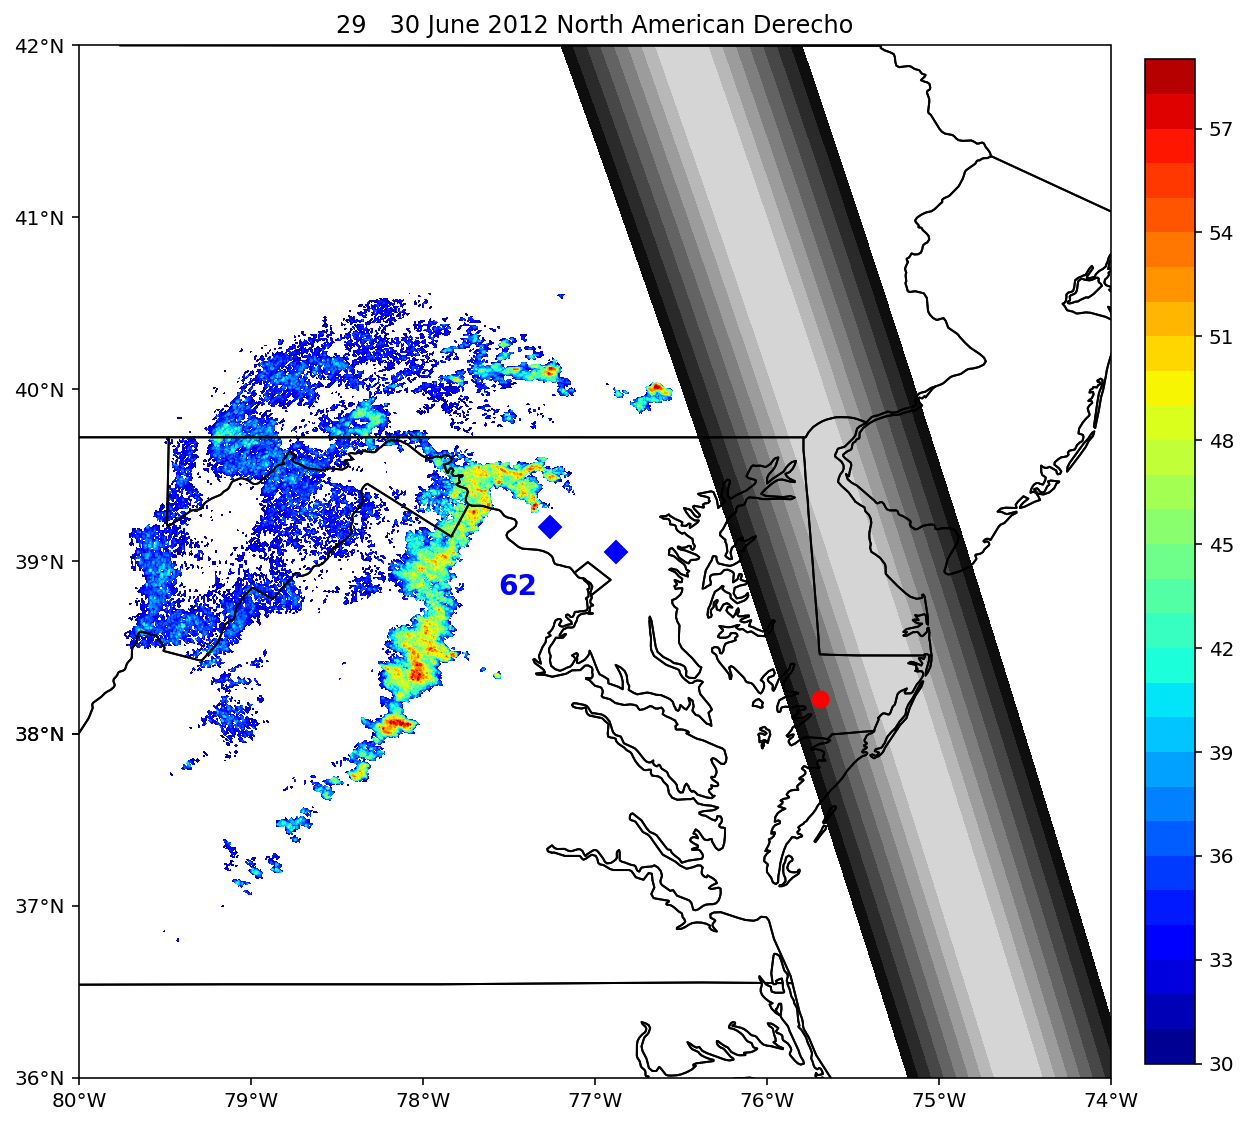

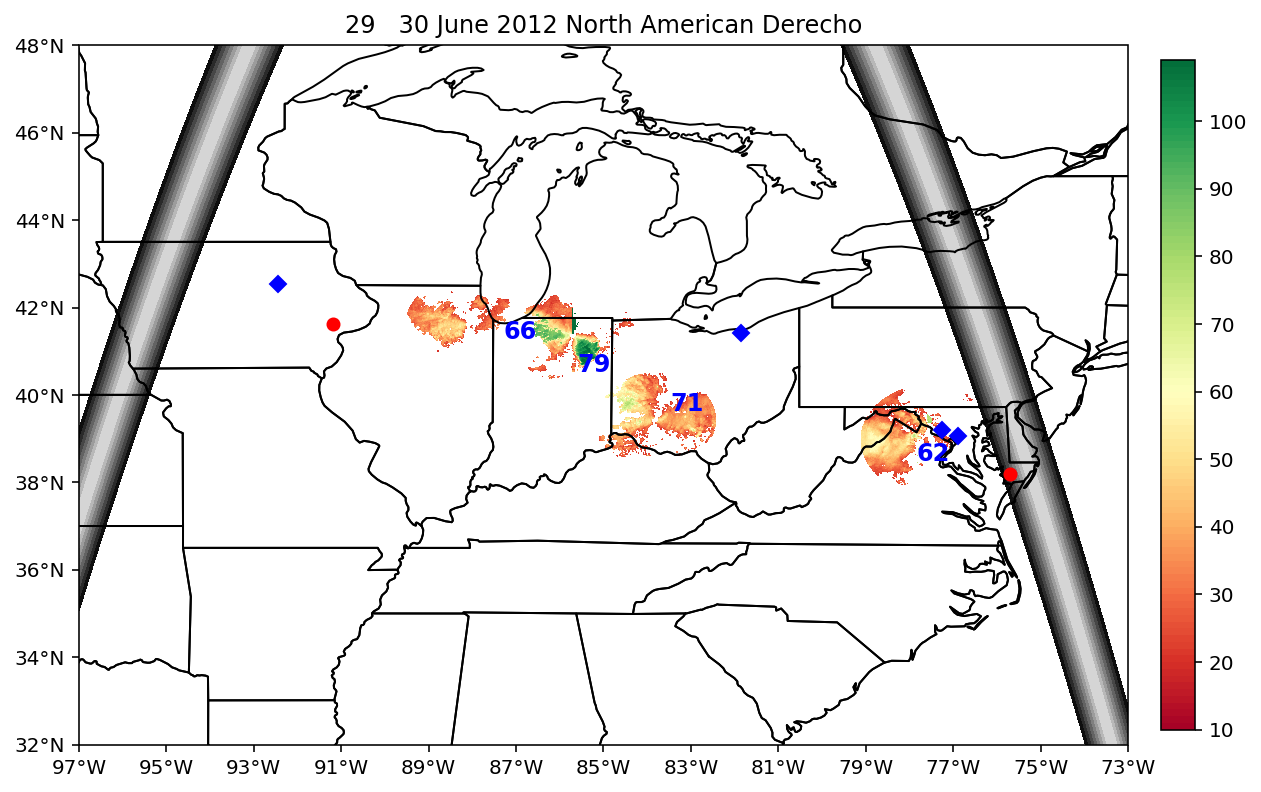

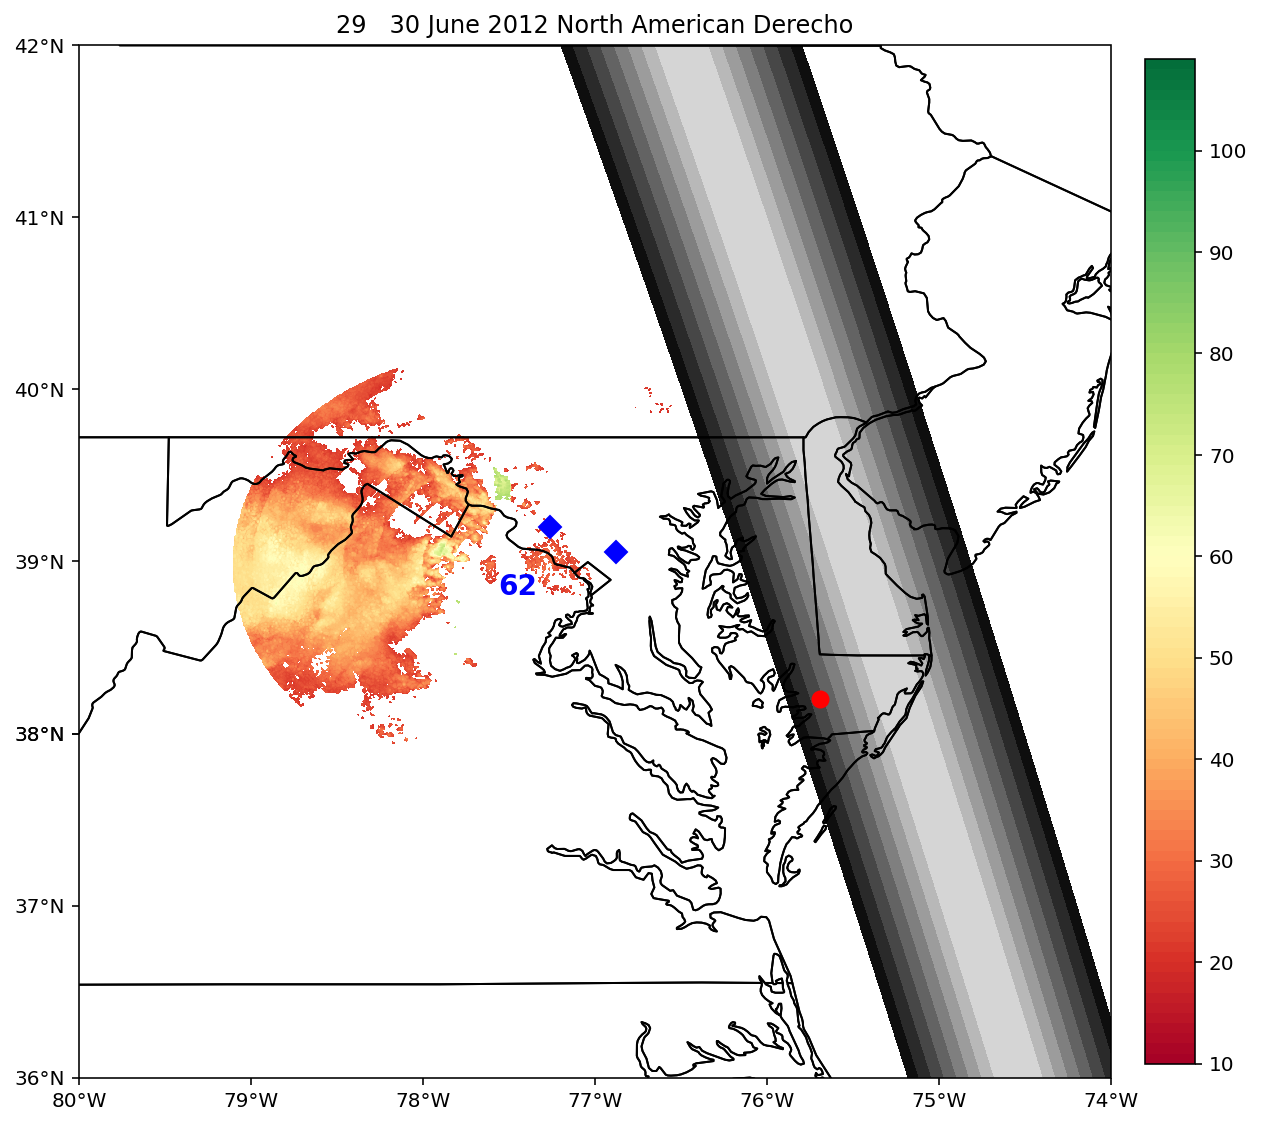

In [3]:
fig = plt.figure(figsize=(10, 12))
img_extent = (-97, -73, 32, 48)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-97, -73, 32, 48], crs.PlateCarree(globe=None))

plt.title('29   30 June 2012 North American Derecho')

SZlevels = np.arange(0,5,0.5)
csz1 = ax.contourf(lons,lats,SZ_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
csz2 = ax.contourf(lons2,lats2,SZ2_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
Zlevels = np.arange(30,60,1)
cZ1 = ax.contourf(lonz_dvn,latz_dvn,Z_30_DVN,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)
cZ2 = ax.contourf(lonz_iwx,latz_iwx,Z_30_IWX,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)
cZ3 = ax.contourf(lonz_iln,latz_iln,Z_30_ILN,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)
cZ4 = ax.contourf(lonz_lwx,latz_lwx,Z_30_LWX,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)

ax.set_xticks([-97,-95,-93,-91,-89,-87,-85,-83,-81,-79,-77,-75,-73])
ax.set_yticks([32,34,36,38,40,42,44,46,48])   

ax.plot(-92.445316, 42.534899, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-91.19, 41.62, 'or', markersize=6, transform=crs.Geodetic())
ax.plot(-81.8621, 41.41398, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-77.262667, 39.200667, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'or', markersize=6, transform=crs.Geodetic())
ax.text(-86.912, 41.729, '66', color='blue', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())  
ax.text(-85.20637, 40.97251, '79', color='blue', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-83.07806, 40.07806, '71', color='red', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='blue', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cZ1,fraction=0.03,pad=0.03)
plt.savefig("map_nad_2012v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-80, -74, 36, 42)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-80, -74, 36, 42], crs.PlateCarree(globe=None))

plt.title('29   30 June 2012 North American Derecho')

SZlevels = np.arange(0,5,0.5)
csz2 = ax.contourf(lons2,lats2,SZ2_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
Zlevels = np.arange(30,60,1)
cZ4 = ax.contourf(lonz_lwx,latz_lwx,Z_30_LWX,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)

ax.set_xticks([-80,-79,-78,-77,-76,-75,-74])
ax.set_yticks([36,37,38,38,39,40,41,42])   

ax.plot(-77.262667, 39.200667, 'Db', markersize=8, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Db', markersize=8, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'or', markersize=8, transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='blue', weight='bold', fontsize=14, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cZ4,fraction=0.045,pad=0.03)
plt.savefig("map_nad_lwx_2012v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-97, -73, 32, 48)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-97, -73, 32, 48], crs.PlateCarree(globe=None))

plt.title('29   30 June 2012 North American Derecho')

SZlevels = np.arange(0,5,0.5)
csz1 = ax.contourf(lons,lats,SZ_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
csz2 = ax.contourf(lons2,lats2,SZ2_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
Vlevels = np.arange(10,110,1)
cV1 = ax.contourf(lonv_lot,latv_lot,V_20_LOT,Vlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='RdYlGn',vmin=10,vmax=110)
cV2 = ax.contourf(lonv_iwx,latv_iwx,V_20_IWX,Vlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='RdYlGn',vmin=10,vmax=110)
cV3 = ax.contourf(lonv_iln,latv_iln,V_20_ILN,Vlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='RdYlGn',vmin=10,vmax=110)
cV4 = ax.contourf(lonv_lwx,latv_lwx,V_20_LWX,Vlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='RdYlGn',vmin=10,vmax=110)

ax.set_xticks([-97,-95,-93,-91,-89,-87,-85,-83,-81,-79,-77,-75,-73])
ax.set_yticks([32,34,36,38,40,42,44,46,48])   

ax.plot(-92.445316, 42.534899, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-91.19, 41.62, 'or', markersize=6, transform=crs.Geodetic())
ax.plot(-81.8621, 41.41398, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-77.262667, 39.200667, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Db', markersize=6, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'or', markersize=6, transform=crs.Geodetic())
ax.text(-86.912, 41.729, '66', color='blue', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())  
ax.text(-85.20637, 40.97251, '79', color='blue', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-83.07806, 40.07806, '71', color='blue', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='blue', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cV1,fraction=0.03,pad=0.03)
plt.savefig("map_nad_V_2012v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-80, -74, 36, 42)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-80, -74, 36, 42], crs.PlateCarree(globe=None))

plt.title('29   30 June 2012 North American Derecho')

SZlevels = np.arange(0,5,0.5)
csz2 = ax.contourf(lons2,lats2,SZ2_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
Vlevels = np.arange(10,110,1)
cV4 = ax.contourf(lonv_lwx,latv_lwx,V_20_LWX,Vlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='RdYlGn',vmin=10,vmax=110)
ax.set_xticks([-80,-79,-78,-77,-76,-75,-74])
ax.set_yticks([36,37,38,38,39,40,41,42])   

ax.plot(-77.262667, 39.200667, 'Db', markersize=8, transform=crs.Geodetic())
ax.plot(-76.87830, 39.05530, 'Db', markersize=8, transform=crs.Geodetic())
ax.plot(-75.69, 38.2, 'or', markersize=8, transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='blue', weight='bold', fontsize=14, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cV4,fraction=0.045,pad=0.03)
plt.savefig("map_nad_V_lwx_2012v2.png",dpi=250,bbox_inches='tight')
plt.show()

sigma 1 =  0.2968720447263553
sigma 2 =  0.5236956294610987
BT1 mean =  281.3868091242
BT1 max = 303.2155634451917
BT1 min = 163.53854934323502
BT1 =  [[270.4507023563966 263.22186919374167 267.91999383564035 ...
  268.8261684464592 270.1148282558607 270.4671533298859]
 [272.47280152065275 268.61367666817563 272.0313669937299 ...
  269.3800179816377 269.62952445644004 269.5212221961914]
 [272.4604632901552 274.20289586181144 274.16313933624457 ...
  269.54726957550304 269.4746110941478 269.61444439215325]
 ...
 [266.9507571504873 264.2404588078743 267.25784204020124 ...
  256.4454378812512 261.727572183502 284.6849095784787]
 [267.0001100784546 265.44412190658005 268.07764902515817 ...
  255.9669886542937 265.5771006301751 287.9216391651428]
 [267.5169449191537 266.42021316781563 268.0598271354771 ...
  256.85671228994767 275.34349688272164 290.7169342139088]] (224, 90)
BT2 mean =  281.86178426518904
BT2 max = 300.56707189474304
BT2 min = 131.31815783623068
BT2 =  [[266.60715261549325 

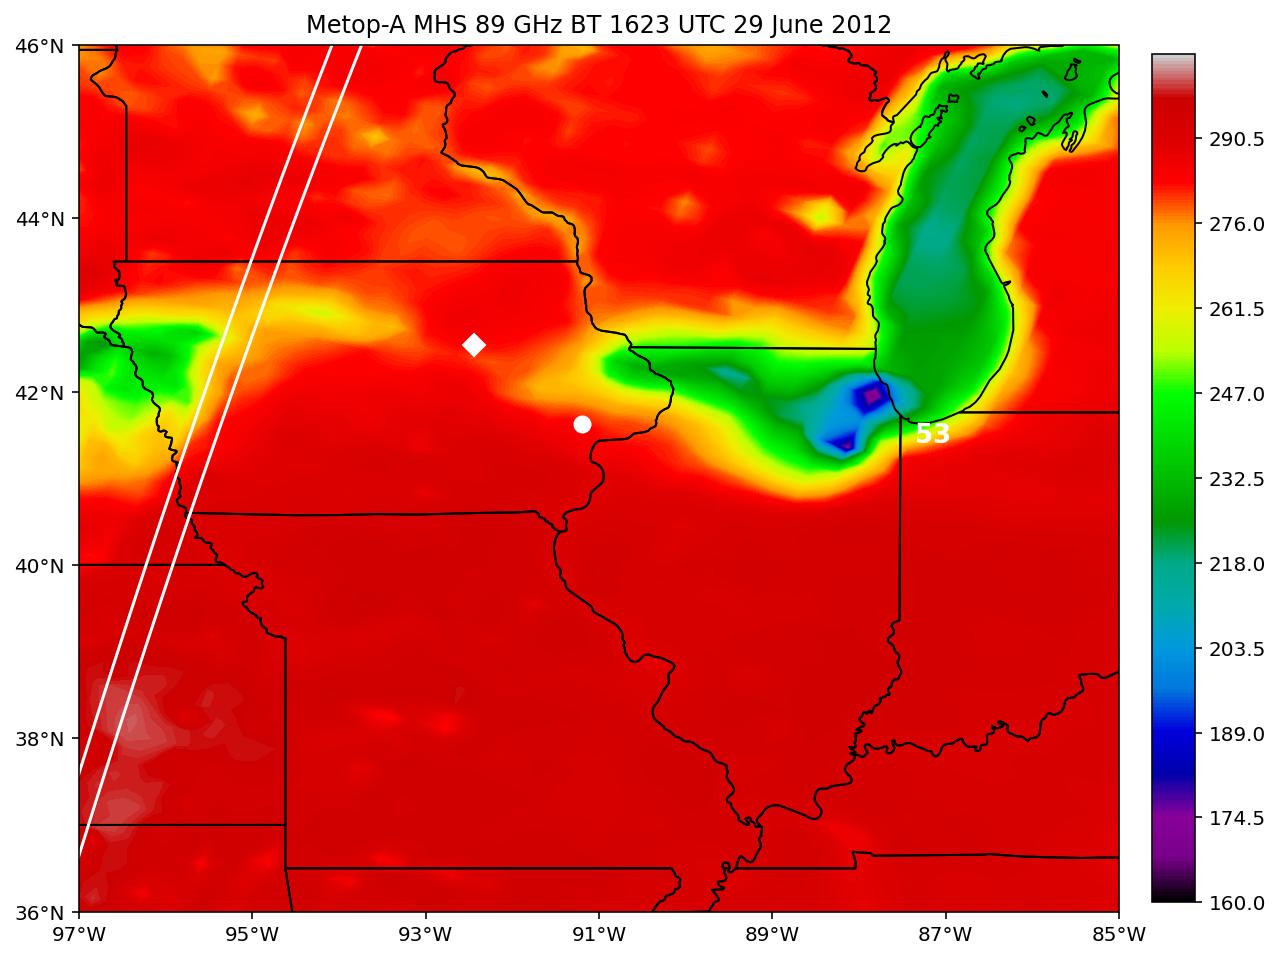

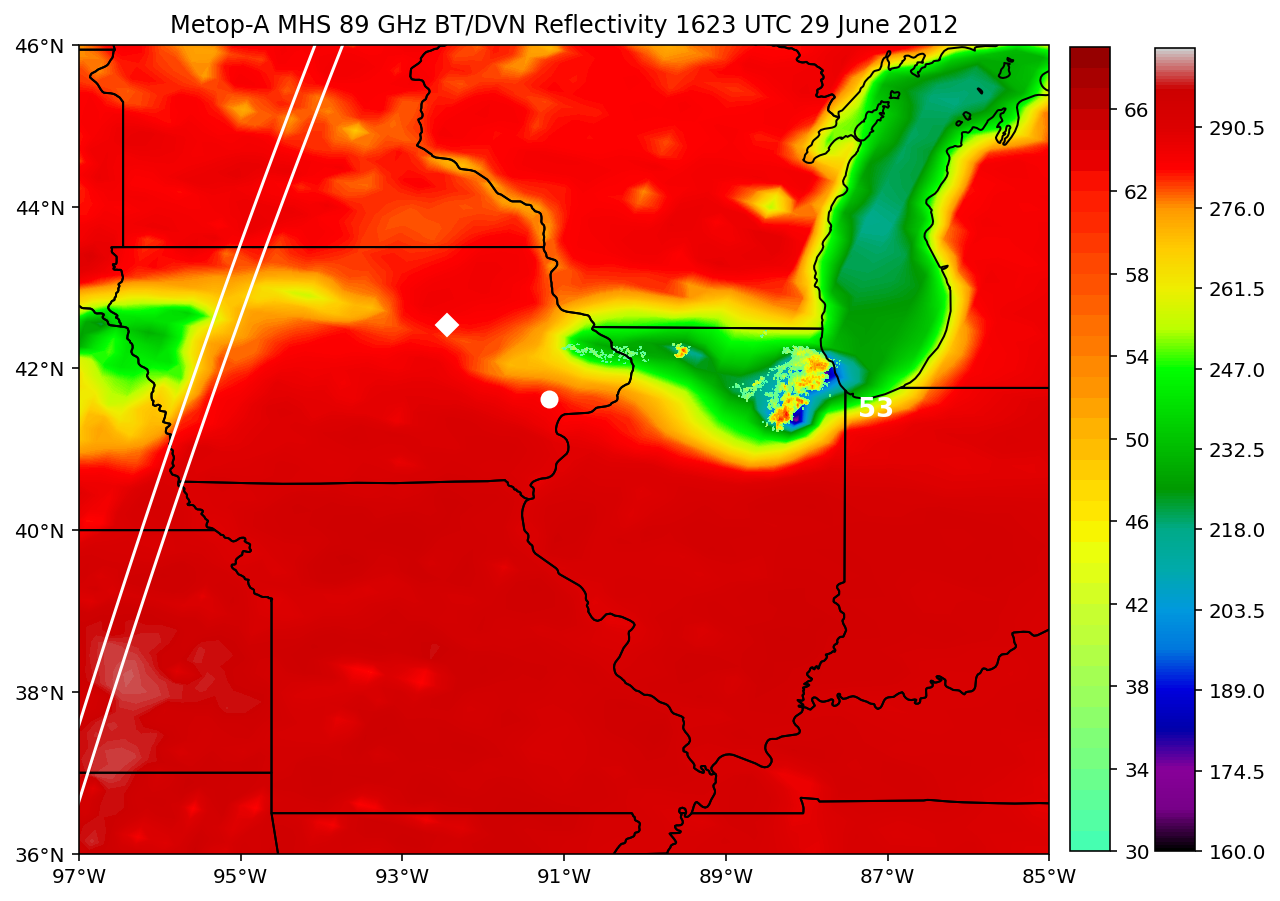

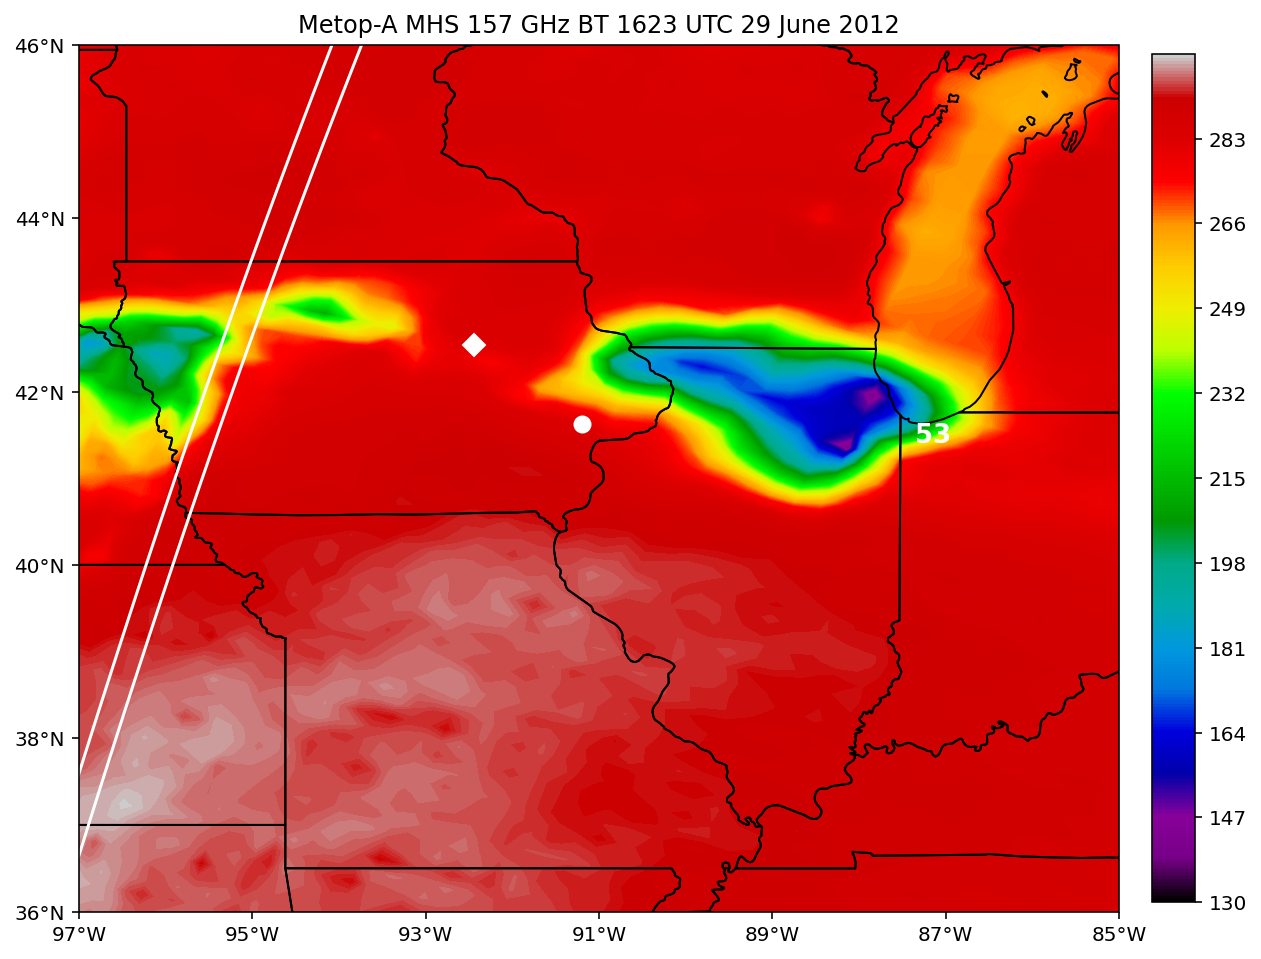

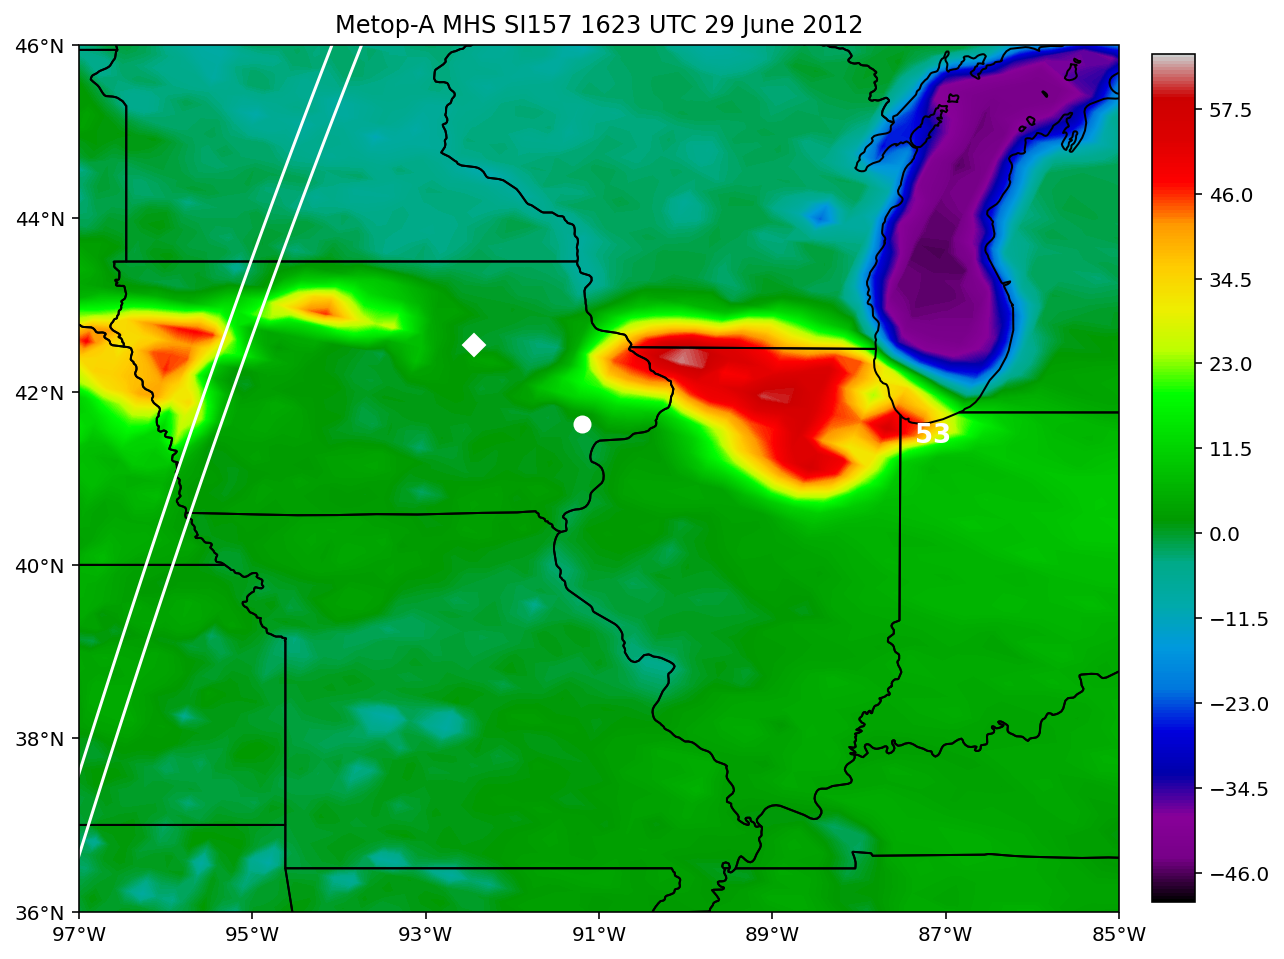

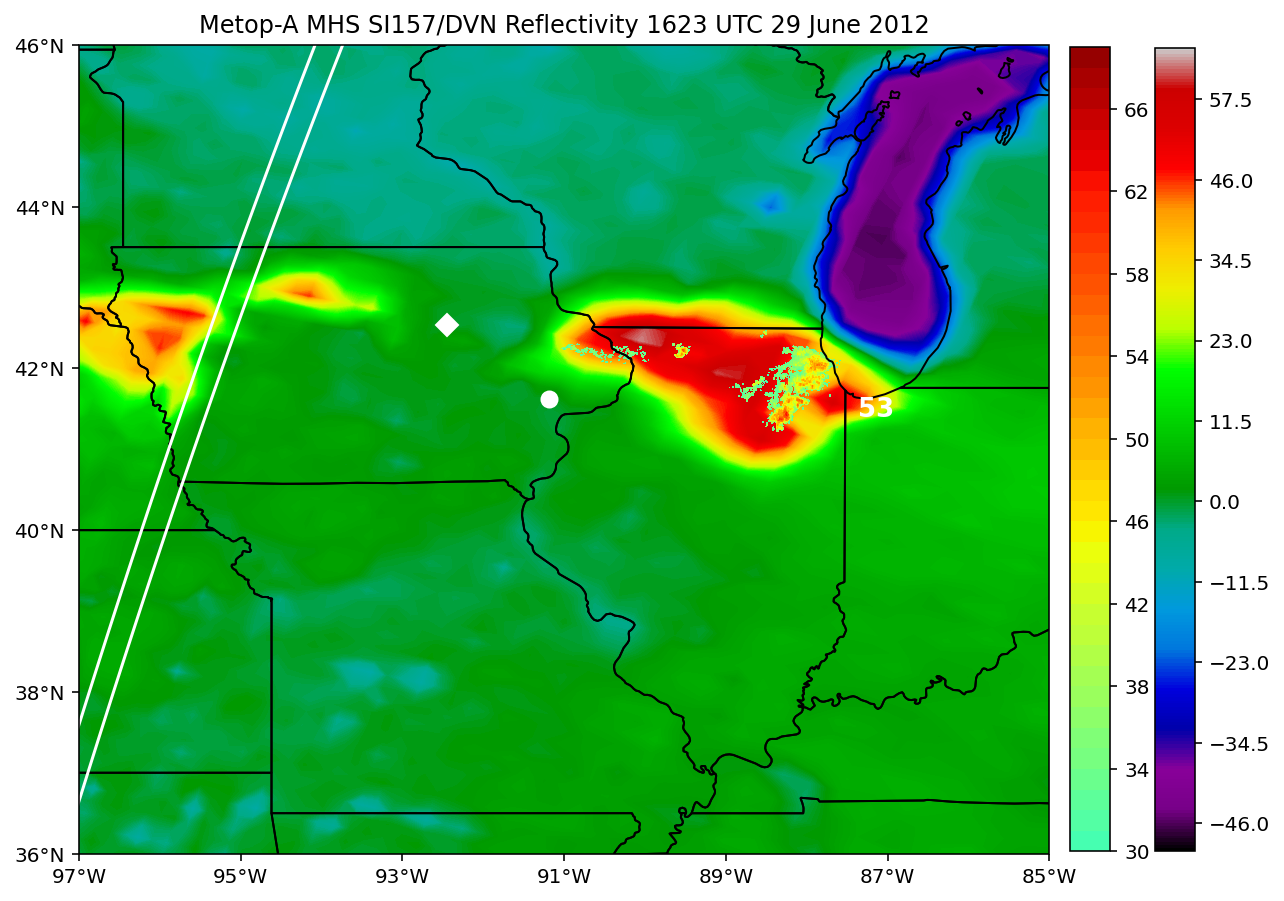

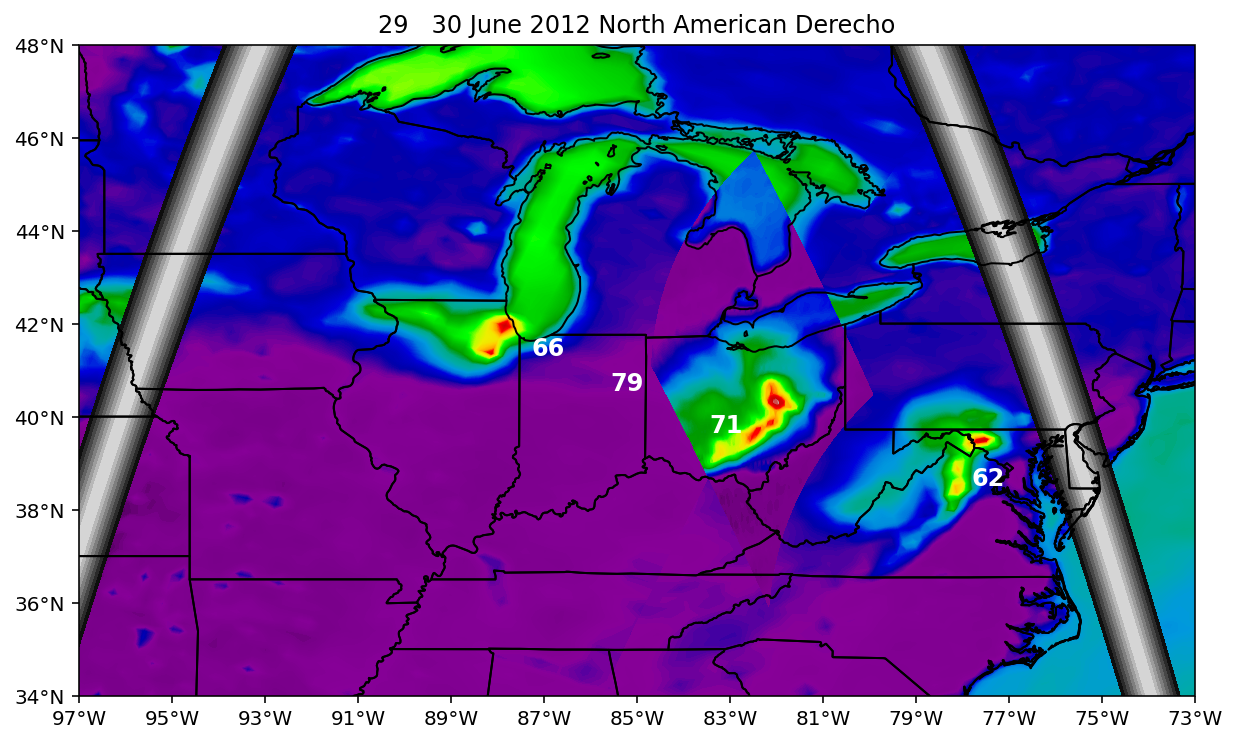

In [21]:
C1 = .00001191
C2 = 1.439
f1 = 8900000000
f2 = 15700000000
c = 29979245800
sigma1 = f1/c
sigma2 = f2/c
print("sigma 1 = ", sigma1)
print("sigma 2 = ", sigma2)
BT1 = (C2*sigma1)/(np.log(1+((C1*(sigma1**3))/R1)))
BT1 = BT1/100
BT1mn = np.mean(BT1)
print("BT1 mean = ", BT1mn)
BT1_max = np.amax(BT1)
BT1_min = np.amin(BT1)
print("BT1 max =", BT1_max)
print("BT1 min =", BT1_min)
print("BT1 = ", BT1, BT1.shape)
BT2 = (C2*sigma2)/(np.log(1+((C1*(sigma2**3))/R2)))
BT2 = BT2/100
BT2mn = np.mean(BT2)
print("BT2 mean = ", BT2mn)
BT2_max = np.amax(BT2)
BT2_min = np.amin(BT2)
print("BT2 max =", BT2_max)
print("BT2 min =", BT2_min)
print("BT2 = ", BT2, BT2.shape)

BTD = BT1 - BT2
BTD_max = np.amax(BTD)
BTD_min = np.amin(BTD)
print("BTD max =", BTD_max)
print("BTD min =", BTD_min)
print("BTD = ", BTD, BTD.shape)

C1 = .00001191
C2 = 1.439
f1 = 8900000000
f2 = 15700000000
c = 29979245800
sigma1 = f1/c
sigma2 = f2/c
print("sigma 1 = ", sigma1)
print("sigma 2 = ", sigma2)
BT2_1 = (C2*sigma1)/(np.log(1+((C1*(sigma1**3))/R2_1)))
BT2_1 = BT2_1/100
BT2_1mn = np.mean(BT2_1)
print("BT1 mean = ", BT2_1mn)
BT2_1_max = np.amax(BT2_1)
BT2_1_min = np.amin(BT2_1)
print("BT1 max =", BT2_1_max)
print("BT1 min =", BT2_1_min)
print("BT1 = ", BT2_1, BT2_1.shape)
BT2_2 = (C2*sigma2)/(np.log(1+((C1*(sigma2**3))/R2_2)))
BT2_2 = BT2_2/100
BT2_2mn = np.mean(BT2_2)
print("BT2 mean = ", BT2_2mn)
BT2_2_max = np.amax(BT2_2)
BT2_2_min = np.amin(BT2_2)
print("BT2 max =", BT2_2_max)
print("BT2 min =", BT2_2_min)
print("BT2 = ", BT2_2, BT2_2.shape)

BTD2 = BT2_1 - BT2_2
BTD2_max = np.amax(BTD2)
BTD2_min = np.amin(BTD2)
print("BTD max =", BTD2_max)
print("BTD min =", BTD2_min)
print("BTD = ", BTD2, BTD2.shape)

fig = plt.figure(figsize=(10, 12))
img_extent = (-97, -85, 36, 46)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-97, -85, 36, 46], crs.PlateCarree(globe=None))

plt.title('Metop-A MHS 89 GHz BT 1623 UTC 29 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,colors='white',extent=img_extent, transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(160,305,0.1)
cbtd = ax.contourf(lons,lats,BT1,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-97,-95,-93,-91,-89,-87,-85])
ax.set_yticks([36,38,40,42,44,46])   

ax.plot(-92.445316, 42.534899, 'Dw', markersize=8, transform=crs.Geodetic())
ax.plot(-91.19, 41.62, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-87.147, 41.646, '53', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())  

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.038,pad=0.03)
plt.savefig("mhs_89T_1623v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-97, -85, 36, 46)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-97, -85, 36, 46], crs.PlateCarree(globe=None))

plt.title('Metop-A MHS 89 GHz BT/DVN Reflectivity 1623 UTC 29 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,colors='white',extent=img_extent,transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(160,305,0.1)
cbtd = ax.contourf(lons,lats,BT1,Tlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
Zlevels = np.arange(30,70,1)
cZ1 = ax.contourf(lonz_dvn,latz_dvn,Z_30_DVN,Zlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=70)

ax.set_xticks([-97,-95,-93,-91,-89,-87,-85])
ax.set_yticks([36,38,40,42,44,46])   

ax.plot(-92.445316, 42.534899, 'Dw', markersize=8, transform=crs.Geodetic())
ax.plot(-91.19, 41.62, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-87.147, 41.646, '53', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())  

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.036,pad=0.04)
cbar2=plt.colorbar(cZ1,fraction=0.039,pad=0.02)
plt.savefig("mhs_89T_Z_1623v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-97, -85, 36, 46)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-97, -85, 36, 46], crs.PlateCarree(globe=None))

plt.title('Metop-A MHS 157 GHz BT 1623 UTC 29 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,extent=img_extent,colors='white',transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(130,300,0.1)
cbtd = ax.contourf(lons,lats,BT2,Tlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-97,-95,-93,-91,-89,-87,-85])
ax.set_yticks([36,38,40,42,44,46])   

ax.plot(-92.445316, 42.534899, 'Dw', markersize=8, transform=crs.Geodetic())
ax.plot(-91.19, 41.62, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-87.147, 41.646, '53', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())  

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.038,pad=0.03)
plt.savefig("mhs_157T_1623v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-97, -85, 36, 46)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-97, -85, 36, 46], crs.PlateCarree(globe=None))

plt.title('Metop-A MHS SI157 1623 UTC 29 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,extent=img_extent,colors='white',transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(-50,65,0.1)
cbtd = ax.contourf(lons,lats,BTD,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-97,-95,-93,-91,-89,-87,-85])
ax.set_yticks([36,38,40,42,44,46])   

ax.plot(-92.445316, 42.534899, 'Dw', markersize=8, transform=crs.Geodetic())
ax.plot(-91.19, 41.62, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-87.147, 41.646, '53', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())  

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.038,pad=0.03)
plt.savefig("mhs_SI157_1623v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-97, -85, 36, 46)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-97, -85, 36, 46], crs.PlateCarree(globe=None))

plt.title('Metop-A MHS SI157/DVN Reflectivity 1623 UTC 29 June 2012')

SZlevels = np.arange(0,2,1)
csz1 = ax.contour(lons,lats,SZ_5,SZlevels,colors='white',extent=img_extent,transform=crs.PlateCarree(globe=None))
Tlevels = np.arange(-50,65,0.1)
cbtd = ax.contourf(lons,lats,BTD,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
Zlevels = np.arange(30,70,1)
cZ1 = ax.contourf(lonz_dvn,latz_dvn,Z_30_DVN,Zlevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=70)

ax.set_xticks([-97,-95,-93,-91,-89,-87,-85])
ax.set_yticks([36,38,40,42,44,46])   

ax.plot(-92.445316, 42.534899, 'Dw', markersize=8, transform=crs.Geodetic())
ax.plot(-91.19, 41.62, 'ow', markersize=8, transform=crs.Geodetic())
ax.text(-87.147, 41.646, '53', color='white', weight='bold', fontsize=13, ha='center', va='top', style='normal', transform=crs.Geodetic())  

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.036,pad=0.04)
cbar2=plt.colorbar(cZ1,fraction=0.039,pad=0.02)
plt.savefig("mhs_SI157_Z_1623v2.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-97, -73, 34, 48)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-97, -73, 34, 48], crs.PlateCarree(globe=None))

plt.title('29   30 June 2012 North American Derecho')

Tlevels3 = np.arange(110,305,0.05)
cbtd3 = ax.contourf(lons3,lats3,BT2_1,Tlevels3,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral_r')
Tlevels1 = np.arange(160,305,0.05)
cbtd1 = ax.contourf(lons,lats,BT1,Tlevels1,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral_r')
Tlevels2 = np.arange(90,305,0.05)
cbtd2 = ax.contourf(lons2,lats2,TB2,Tlevels2,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral_r')
SZlevels = np.arange(0,5,0.5)
csz1 = ax.contourf(lons,lats,SZ_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')
csz2 = ax.contourf(lons3,lats3,SZ2_5,SZlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='binary')

ax.set_xticks([-97,-95,-93,-91,-89,-87,-85,-83,-81,-79,-77,-75,-73])
ax.set_yticks([34,36,38,40,42,44,46,48])   

ax.text(-86.912, 41.729, '66', color='white', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())  
ax.text(-85.20637, 40.97251, '79', color='white', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-83.07806, 40.07806, '71', color='white', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())
ax.text(-77.44750, 38.93472, '62', color='white', weight='bold', fontsize=12, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
plt.savefig("map_nad_mhs_ssmis_2012.png",dpi=250,bbox_inches='tight')
plt.show()


/tmp/ipykernel_1797/1618057832.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
/tmp/ipykernel_1797/1618057832.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_fid.variables['lat'][:]  # extract/copy the data
/tmp/ipykernel_1797/1618057832.py:5: DeprecationWarni

dict_keys(['Reflectivity', 'lat', 'lon', 'time'])
Z_DMX shape (587, 815) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_DMX min, Z_DMX max -22.0 63.5
lat shape, lon shape (587,) (813,)
Z shape (587, 815) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Z_30 shape (587, 815)
Z_40 shape (587, 815)
lats shape, lons shape (587, 815) (587, 815) [[39.49501515 39.49501515 39.49501515 ... 39.49501515 39.49501515
  39.49501515]
 [39.50251934 39.50251934 39.50251934 ... 39.50251934 39.50251934
  39.50251934]
 [39.51002353 39.51002353 39.51002353 ... 39.51002353 39.51002353
  39.51002353]
 ...
 [43.87746135 43.87746135 43.87746135 ... 43.87746135 43.87746135
  43.87746135]
 [43.88496554 43.88496554 43.88496554 ... 43.88496554 43.88496554
  43.88496554]
 [43.89246973 43.89246973 43.8

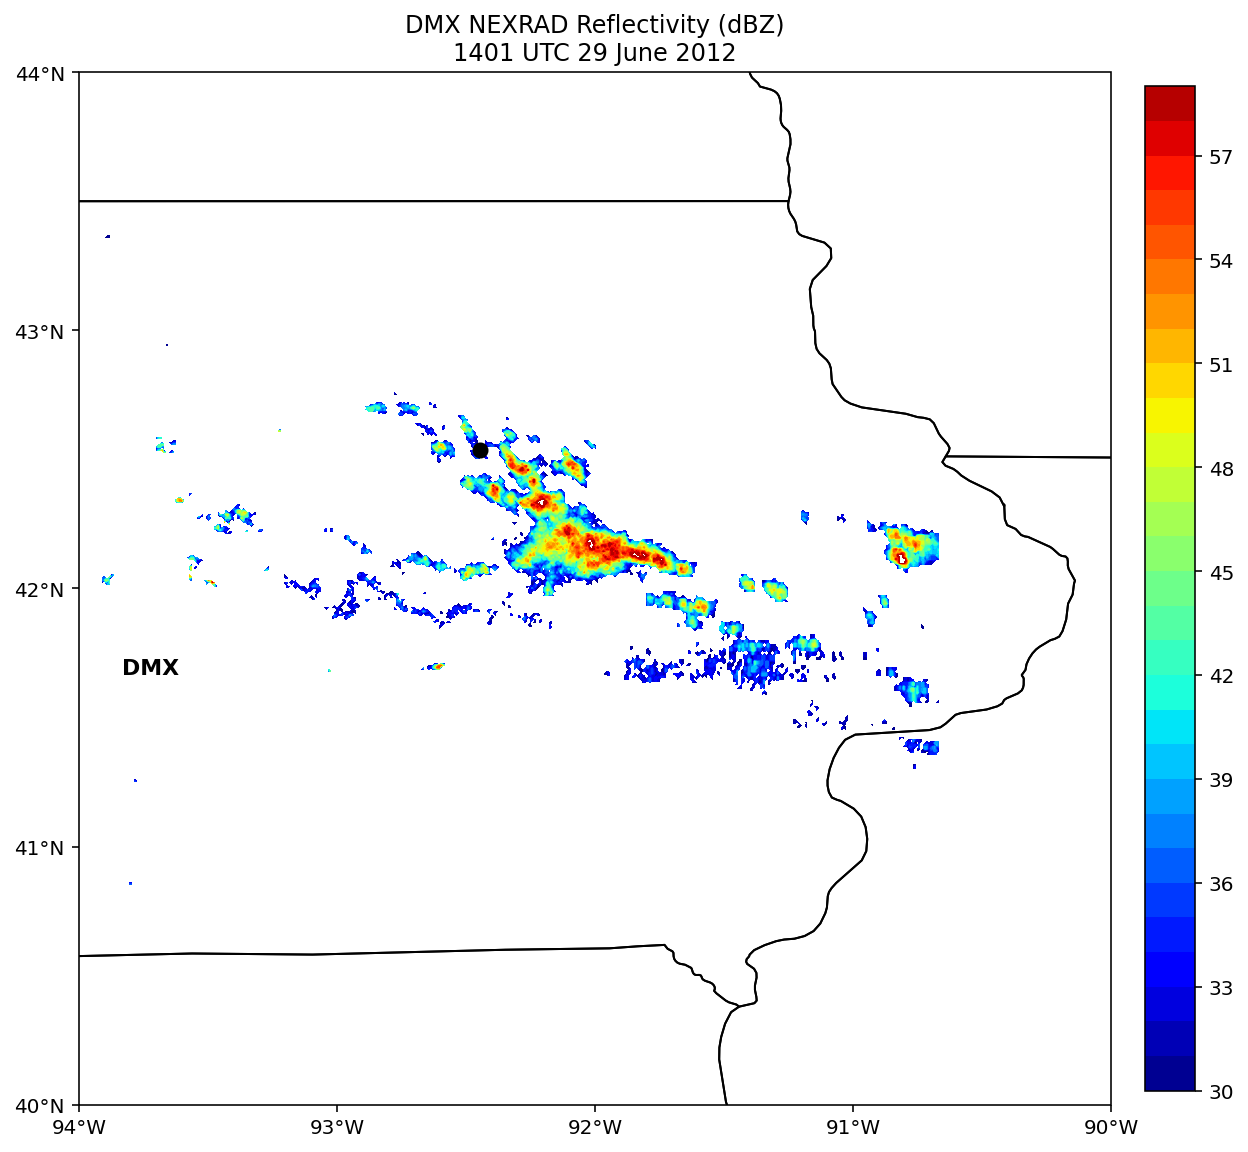

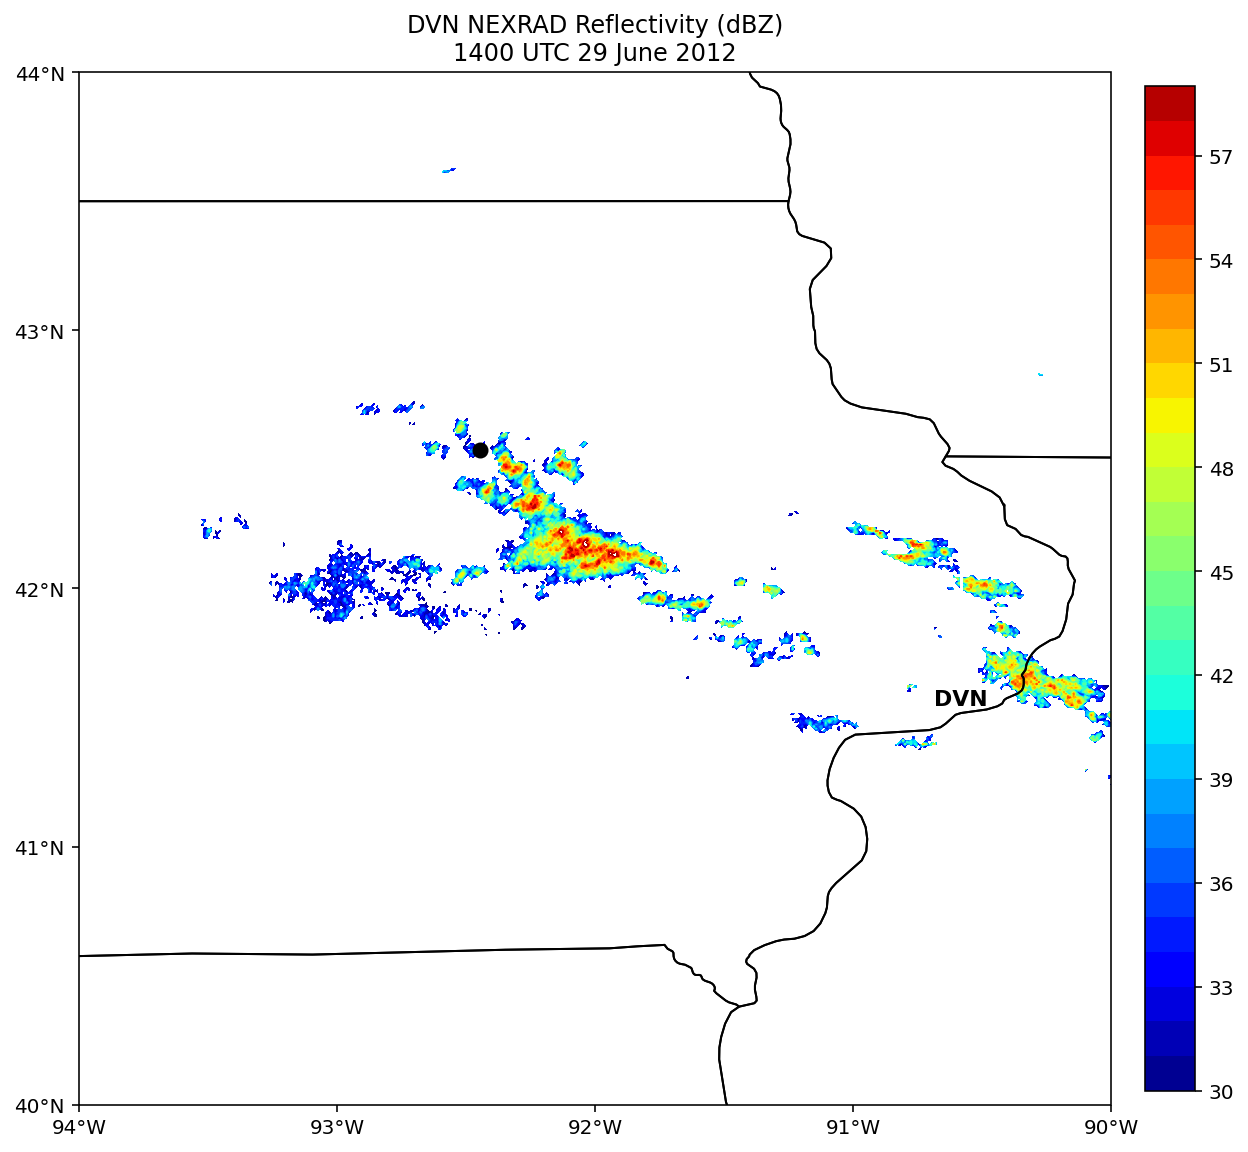

In [8]:
def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

def make_radar_mask(Z,lat,lon):
    Z[Z>70]=69
    print('Z shape', Z.shape, Z)
    Z_30 = ma.masked_where(Z < 30, Z)
    print('Z_30 shape', Z_30.shape)
    Z_40 = ma.masked_where(Z < 40, Z)
    print('Z_40 shape', Z_40.shape)
    lonz,latz = np.meshgrid(lon,lat)
    print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)
    return Z_30, Z_40, lonz, latz

Z_file_DMX = 'KDMX_V03_20120629_140116.nc'
Z_DMX, lat_dmx, lon_dmx, names = read_radar_plot(Z_file_DMX)
Z_DMX = Z_DMX[0,:,:]
Z_DMX = np.nan_to_num(Z_DMX)
print(names)
print('Z_DMX shape', Z_DMX.shape, Z_DMX)
Z_DMX_max = np.amax(Z_DMX)
Z_DMX_min = np.amin(Z_DMX)
print('Z_DMX min, Z_DMX max', Z_DMX_min, Z_DMX_max)
print('lat shape, lon shape', lat_dvn.shape, lon_dvn.shape)

Z_30_DMX, Z_40_DMX, lonz_dmx, latz_dmx = make_radar_mask(Z_DMX, lat_dmx, lon_dmx) 

Z_file_DVN = 'KDVN_V06_20120629_135910.nc'
Z_DVN, lat_dvn, lon_dvn, names = read_radar_plot(Z_file_DVN)
Z_DVN = Z_DVN[0,:,:]
Z_DVN = np.nan_to_num(Z_DVN)
print(names)
print('Z_DVN shape', Z_DVN.shape, Z_DVN)
Z_DVN_max = np.amax(Z_DVN)
Z_DVN_min = np.amin(Z_DVN)
print('Z_DVN min, Z_DVN max', Z_DVN_min, Z_DVN_max)
print('lat shape, lon shape', lat_dvn.shape, lon_dvn.shape)

Z_30_DVN, Z_40_DVN, lonz_dvn, latz_dvn = make_radar_mask(Z_DVN, lat_dvn, lon_dvn) 

fig = plt.figure(figsize=(10, 12))
img_extent = (-94, -90, 40, 44)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-94, -90, 40, 44], crs.PlateCarree(globe=None))

plt.title('DMX NEXRAD Reflectivity (dBZ)\n'
          '1401 UTC 29 June 2012')

Zlevels = np.arange(30,60,1)
cZ = ax.contourf(lonz_dmx,latz_dmx,Z_30_DMX,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)

ax.set_xticks([-94,-93,-92,-91,-90])
ax.set_yticks([40,41,42,43,44])   

ax.plot(-92.445316, 42.534899, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-93.722869, 41.7312, 'DMX', color='black', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cZ,fraction=0.045,pad=0.03)
plt.savefig("Z_DMX_1401.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-94, -90, 40, 44)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-94, -90, 40, 44], crs.PlateCarree(globe=None))

plt.title('DVN NEXRAD Reflectivity (dBZ)\n'
          '1400 UTC 29 June 2012')

Zlevels = np.arange(30,60,1)
cZ = ax.contourf(lonz_dvn,latz_dvn,Z_30_DVN,Zlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=30,vmax=60)

ax.set_xticks([-94,-93,-92,-91,-90])
ax.set_yticks([40,41,42,43,44])   

ax.plot(-92.445316, 42.534899, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-90.580833, 41.611667, 'DVN', color='black', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cZ,fraction=0.045,pad=0.03)
plt.savefig("Z_DVN_1400.png",dpi=250,bbox_inches='tight')
plt.show()
